# Import Libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

In [51]:
from scipy import stats
from scipy.stats import norm, skew 
import scipy.cluster.hierarchy as shc

In [52]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import classification_report, f1_score 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold 
from sklearn.preprocessing import MinMaxScaler

In [53]:
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

In [54]:
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [55]:
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [56]:
allen = pd.read_csv("Dataset.csv")

In [57]:
allen.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
allen.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [59]:
allen.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# EDA - Exploratory Data Analysis - I

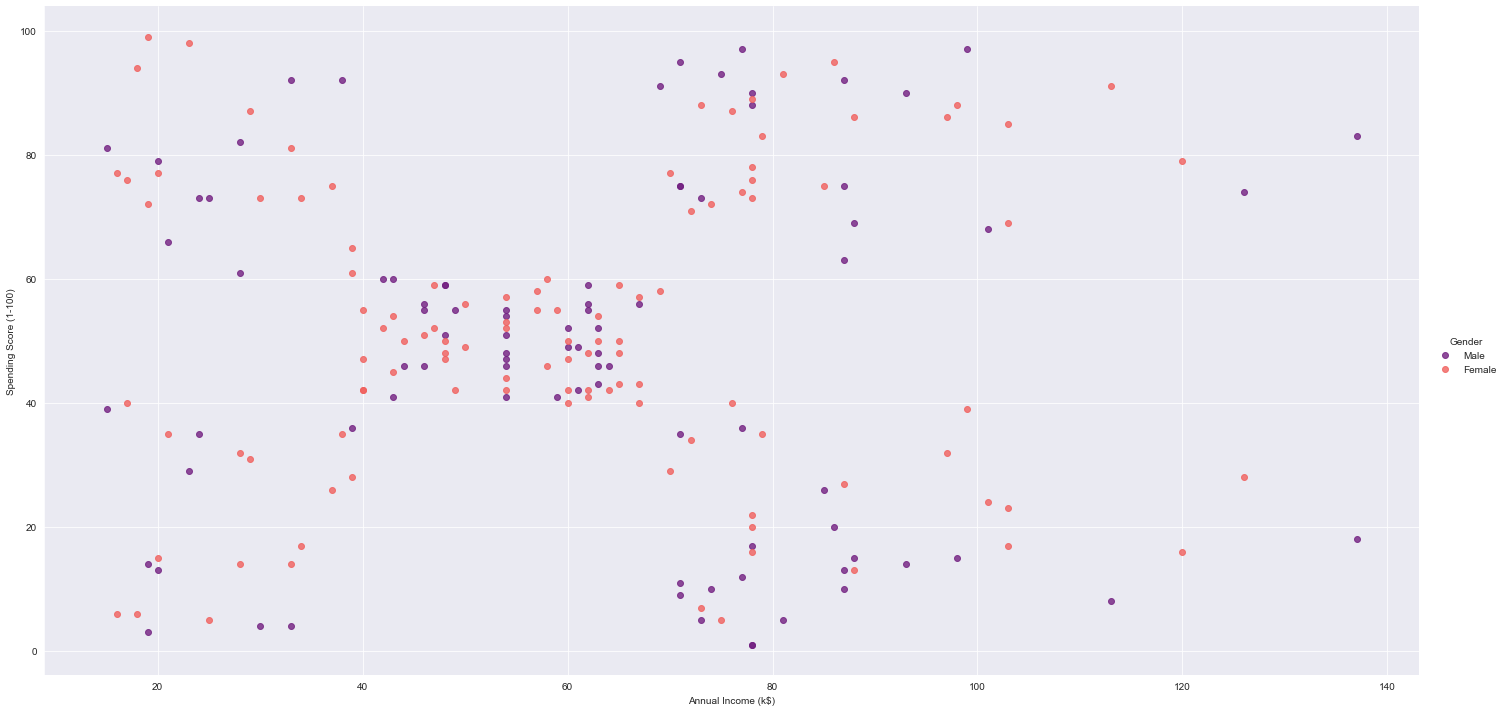

In [60]:
sns.set_style('darkgrid')
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data=allen, hue='Gender',
           palette='magma', size=10, aspect=2, fit_reg=False)

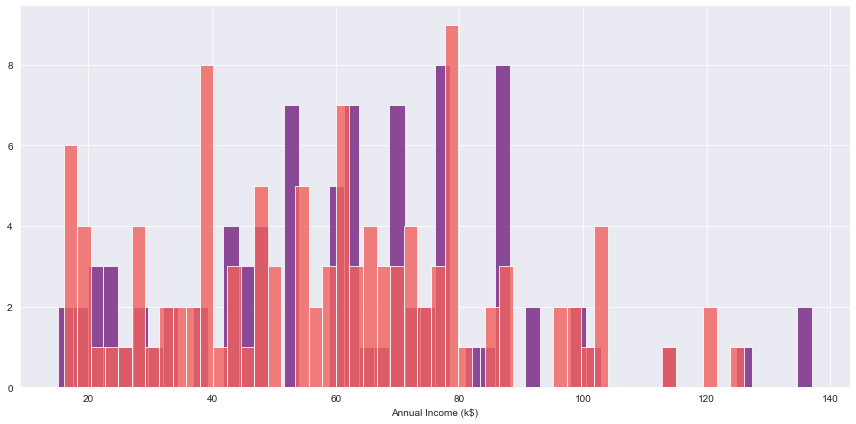

In [61]:
sns.set_style('darkgrid')
g1 = sns.FacetGrid(allen,hue="Gender",palette='magma',size=6,aspect=2)
g1 = g1.map(plt.hist,'Annual Income (k$)',bins=50,alpha=0.8)

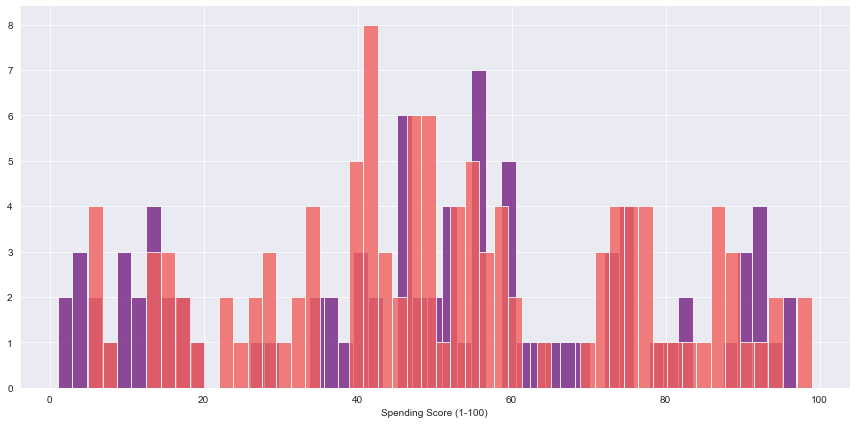

In [62]:
sns.set_style('darkgrid')
g2 = sns.FacetGrid(allen,hue="Gender",palette='magma',size=6,aspect=2)
g2 = g2.map(plt.hist,'Spending Score (1-100)',bins=50,alpha=0.8)

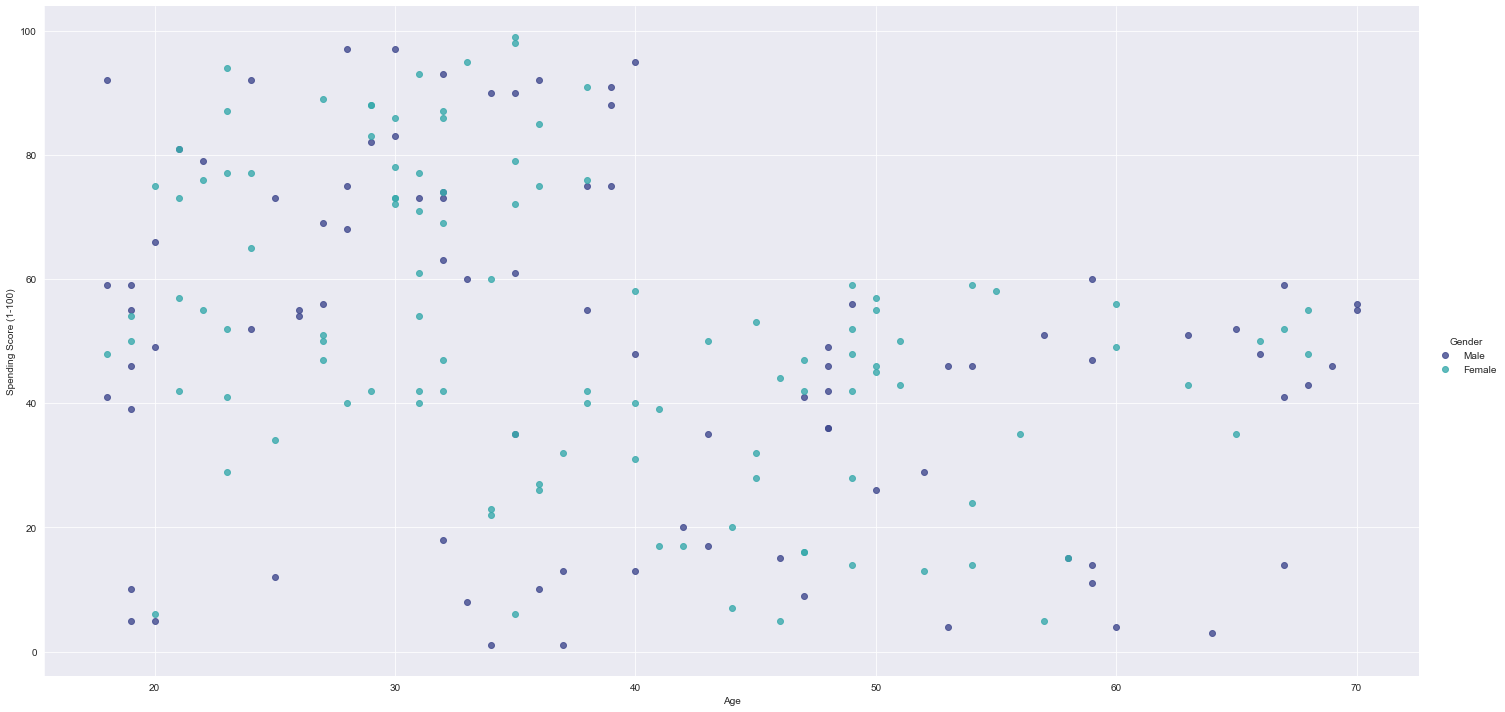

In [63]:
sns.set_style('darkgrid')
sns.lmplot('Age', 'Spending Score (1-100)', data=allen, hue='Gender',
           palette='mako', size=10, aspect=2, fit_reg=False)

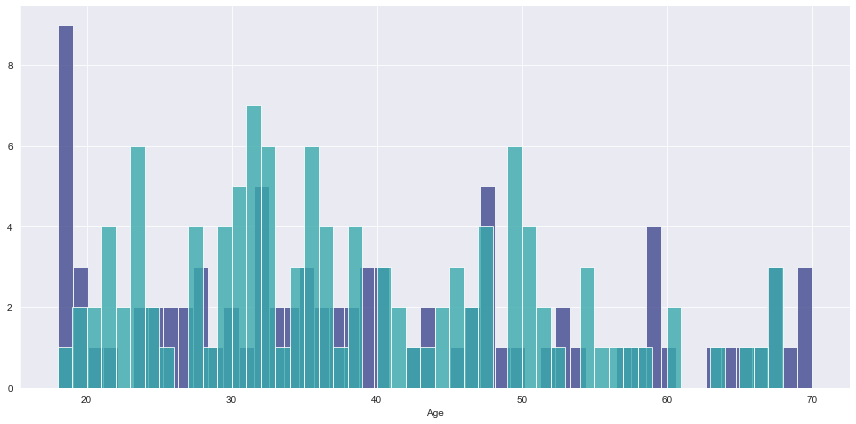

In [64]:
sns.set_style('darkgrid')
g3 = sns.FacetGrid(allen,hue="Gender",palette='mako',size=6,aspect=2)
g3 = g3.map(plt.hist,'Age',bins=50,alpha=0.8)

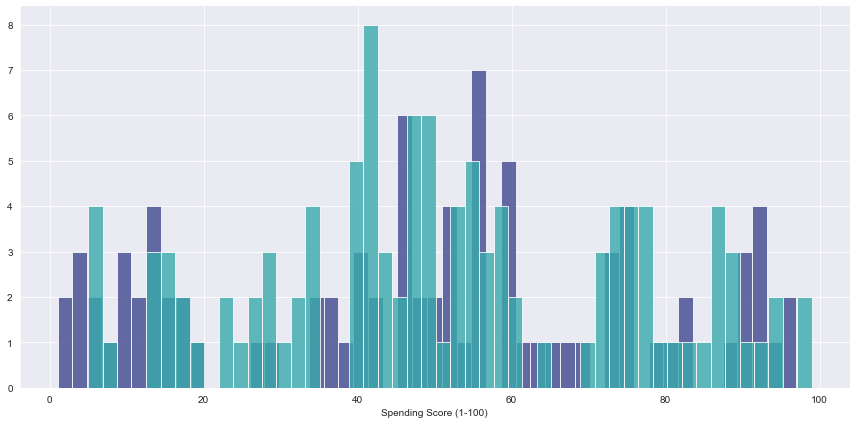

In [65]:
sns.set_style('darkgrid')
g4 = sns.FacetGrid(allen,hue="Gender",palette='mako',size=6,aspect=2)
g4 = g4.map(plt.hist,'Spending Score (1-100)',bins=50,alpha=0.8)

# EDA - Exploratory Data Analysis - II

In [66]:
px.box(allen[['Gender', 'Spending Score (1-100)']].sort_values(by='Gender'), 
        x='Gender', y='Spending Score (1-100)', color='Gender')

In [67]:
px.box(allen[['Gender', 'Annual Income (k$)']].sort_values(by='Gender'), 
        x='Gender', y='Annual Income (k$)', color='Gender')

In [68]:
px.box(allen[['Gender', 'Age']].sort_values(by='Gender'), 
        x='Gender', y='Age', color='Gender')

In [69]:
px.scatter(allen, x='Annual Income (k$)', y='Spending Score (1-100)', color='Age')

In [70]:
px.scatter(allen, x='Annual Income (k$)', y='Spending Score (1-100)', color='Gender')

# EDA - Exploratory Data Analysis - III

In [71]:
allen_corr = allen.corr()
allen_corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [72]:
allen_corr.style.background_gradient(cmap='coolwarm', axis=None)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


# Label Encoding

In [73]:
l1 = preprocessing.LabelEncoder()
f1 = l1.fit_transform(allen['Gender']) 
f1 = pd.DataFrame(data=f1, columns=['Gender'])

In [74]:
print(list(l1.inverse_transform([0,1])))

['Female', 'Male']


In [75]:
allen['Gender'] = f1['Gender']

In [76]:
allen.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# PCA

### Model

In [78]:
model0 = PCA(n_components = 2)
model0.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

PCA(n_components=2)

In [79]:
allen0 = model0.transform(allen.drop(['CustomerID', 'Gender'], axis=1))

In [80]:
model0.explained_variance_ratio_

array([0.45125272, 0.44098465])

### Plotting

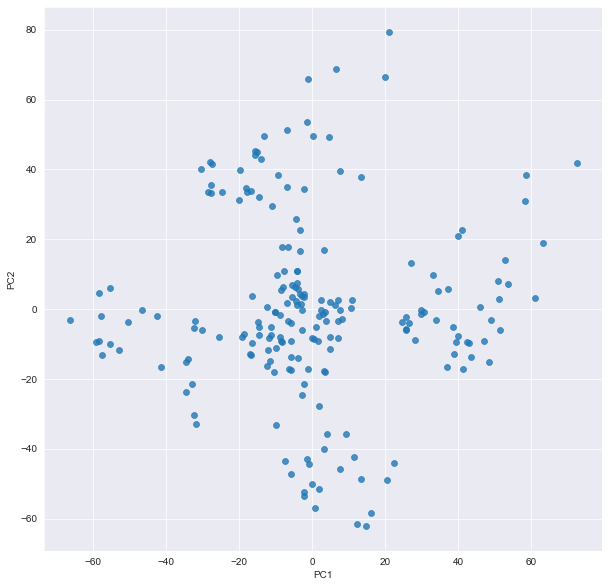

In [82]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# K-Means

### Elbow Method 

In [35]:
inertia = []
for n in range(2,11):
    model1 = KMeans(n_clusters = n, random_state = 21, algorithm = 'elkan')
    model1.fit(allen.drop(['CustomerID', 'Gender'], axis=1))
    inertia.append(model1.inertia_)

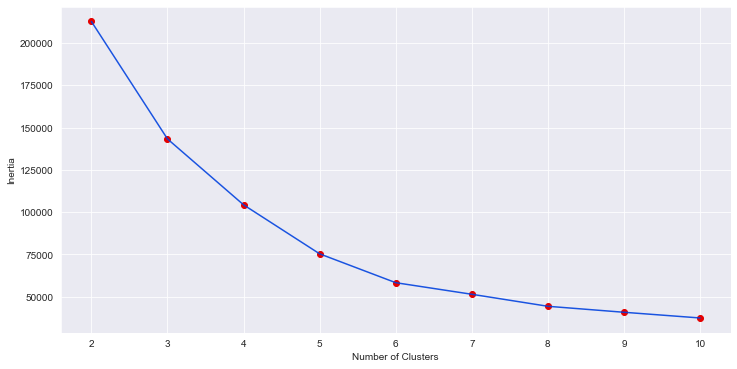

In [36]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(2,11), inertia, 'o', c = sns.xkcd_rgb['red'])
plt.plot(np.arange(2,11), inertia, '-', c = sns.xkcd_rgb['blue'], alpha = 0.9)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Model

In [86]:
model1 = KMeans(n_clusters = 5, random_state = 21, algorithm = "elkan")
model1.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

KMeans(algorithm='elkan', n_clusters=5, random_state=21)

In [90]:
allen1 = model1.labels_

In [88]:
model1.cluster_centers_

array([[40.32432432, 87.43243243, 18.18918919],
       [43.28205128, 55.02564103, 49.69230769],
       [25.52173913, 26.30434783, 78.56521739],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513]])

### Plotting

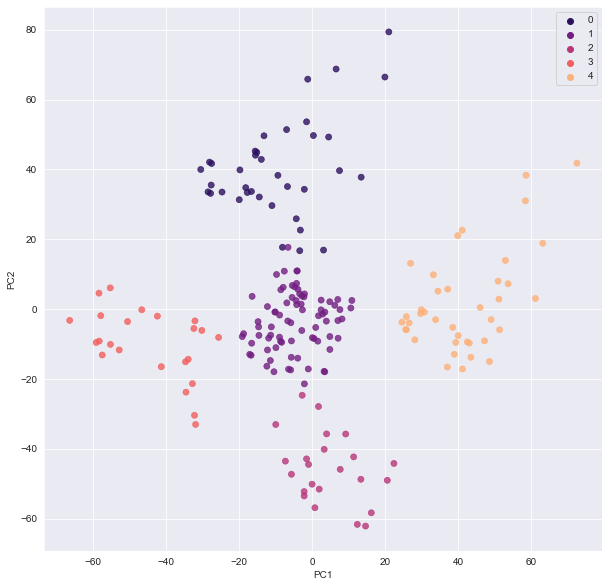

In [89]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=allen1,
    palette=sns.color_palette('magma', 5), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Save

In [ ]:
allen11 = pd.DataFrame({'Model':'K-Means',
                      'Accuracy':[(c1[0,0]+c1[1,1])/sum(sum(c1))*100],
                      'F1 Score':[f11*100]})

In [84]:
allen11.head()

,Model,Accuracy,F1 Score
0,K-Means,57.5,0.0


# Birch

### Model

In [91]:
model2 = Birch(branching_factor = 2, n_clusters = 5, threshold = 10)
model2.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

Birch(branching_factor=2, n_clusters=5, threshold=10)

In [95]:
allen2 = model2.labels_

In [ ]:
model2.cluster_centers_

### Plotting

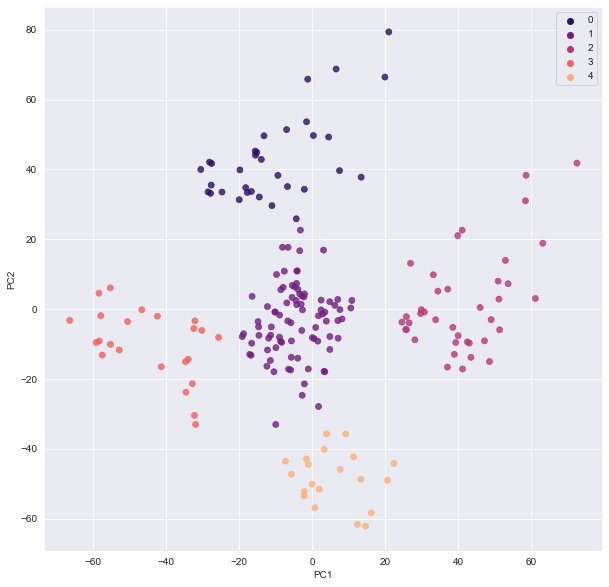

In [97]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=allen2,
    palette=sns.color_palette('magma', 5), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Save

In [245]:
allen12 = pd.DataFrame({'Model':'Birch',
                      'Accuracy':[(c2[0,0]+c2[1,1])/sum(sum(c2))*100],
                      'F1 Score':[f12*100]})

In [246]:
allen12.head()

,Model,Accuracy,F1 Score
0,Birch,10.16731,3.055556


# FeatureAgglomeration

In [295]:
model3 = FeatureAgglomeration(n_clusters = None, distance_threshold = 2)
model3.fit(allen.drop(["Private", "Unnamed: 0"],axis=1))

FeatureAgglomeration(distance_threshold=2, n_clusters=None)

In [296]:
allen3 = allen
allen3['Cluster'] = allen['Private'].apply(converter)

In [297]:
allen3.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


### Confusion Matrix

In [ ]:
print(confusion_matrix(allen3['Cluster'],model3.labels_))

### Classification Report

In [ ]:
print(classification_report(allen3['Cluster'],model3.labels_))

### Accuracy

In [71]:
c3 = confusion_matrix(ytest,p3)
print('Accuracy: {:.2%}'.format((c3[0,0]+c3[1,1])/sum(sum(c3))))

Accuracy: 90.00%


### F1 Score

In [72]:
f13 = f1_score(ytest,p3)
print('F1 Score: {:.2%}'.format(f13))

F1 Score: 84.21%


### Save

In [ ]:
allen13 = pd.DataFrame({'Model':'Feature Agglomeration',
                      'Accuracy':[acc],
                      'F1 Score':[f1s]})

In [ ]:
allen13.head()

# MeanShift

In [73]:
model4 = KNeighborsClassifier()
model4.fit(xtrain,ytrain)
p4 = model4.predict(xtest)

### Confusion Matrix

In [74]:
print(confusion_matrix(ytest,p4))

[[36  2]
 [10 12]]


### Accuracy

In [76]:
c4 = confusion_matrix(ytest,p4)
print('Accuracy: {:.2%}'.format((c4[0,0]+c4[1,1])/sum(sum(c4))))

Accuracy: 80.00%


### F1 Score

In [77]:
f14 = f1_score(ytest,p4)
print('F1 Score: {:.2%}'.format(f14))

F1 Score: 66.67%


### Save

In [ ]:
allen14 = pd.DataFrame({'Model':'Mean Shift',
                      'Accuracy':[acc],
                      'F1 Score':[f1s]})

In [ ]:
allen14.head()

# Concat

In [183]:
al = pd.concat([allen11,allen12,allen13,allen14],axis=0).reset_index()
al = al.drop('index',axis=1)
al

,Model,Accuracy,Precision,F1 Score
0,Random Forest,0.882353,0.812629,0.851371
1,Decision Tree,0.876471,0.850546,0.836372
2,Naive Bayes,0.876471,0.857514,0.816352
3,K-Nearest Neighbour,0.805882,0.798139,0.689109
4,Logistic Regression,0.644118,NA,0.000000
